## El método del codo y el factor de la silueta del clustering

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)


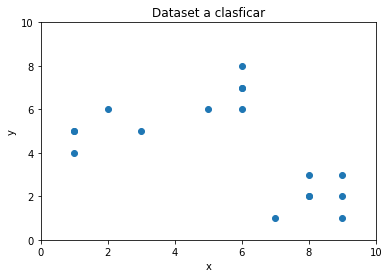

In [3]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasficar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

C:\DataSciencePython\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


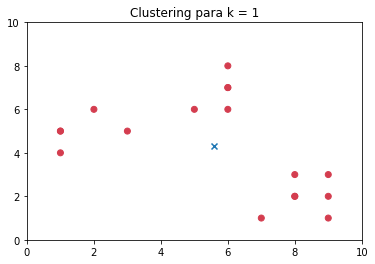

* para K =  2  el promedio de la silueta es de :  0.6113424368705715
  - para i =  1  la silueta del cluster vale:  0.49704450958269375
  - para i =  2  la silueta del cluster vale:  0.7746251901389686


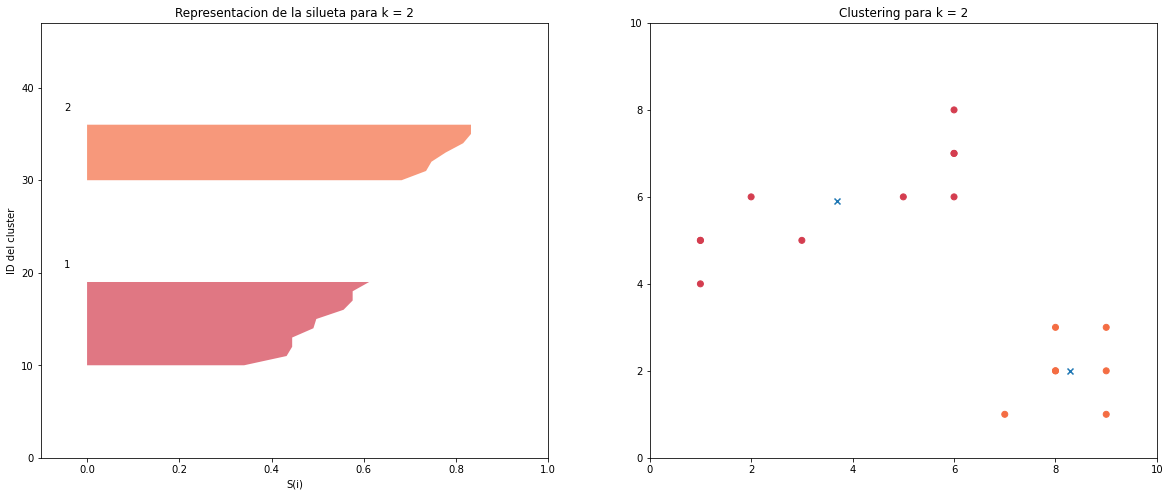

* para K =  3  el promedio de la silueta es de :  0.7122079383287169
  - para i =  1  la silueta del cluster vale:  0.7345257364682265
  - para i =  2  la silueta del cluster vale:  0.6609508863896014
  - para i =  3  la silueta del cluster vale:  0.7322200728725188


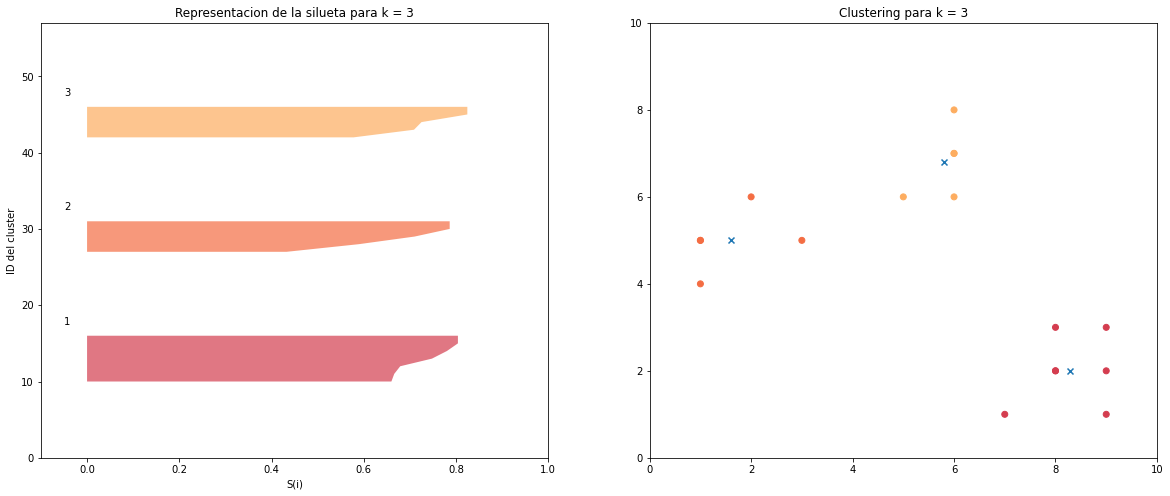

* para K =  4  el promedio de la silueta es de :  0.6389948643127632
  - para i =  1  la silueta del cluster vale:  0.24096929517637128
  - para i =  2  la silueta del cluster vale:  0.7345257364682265
  - para i =  3  la silueta del cluster vale:  0.654458796162702
  - para i =  4  la silueta del cluster vale:  0.655666655624379


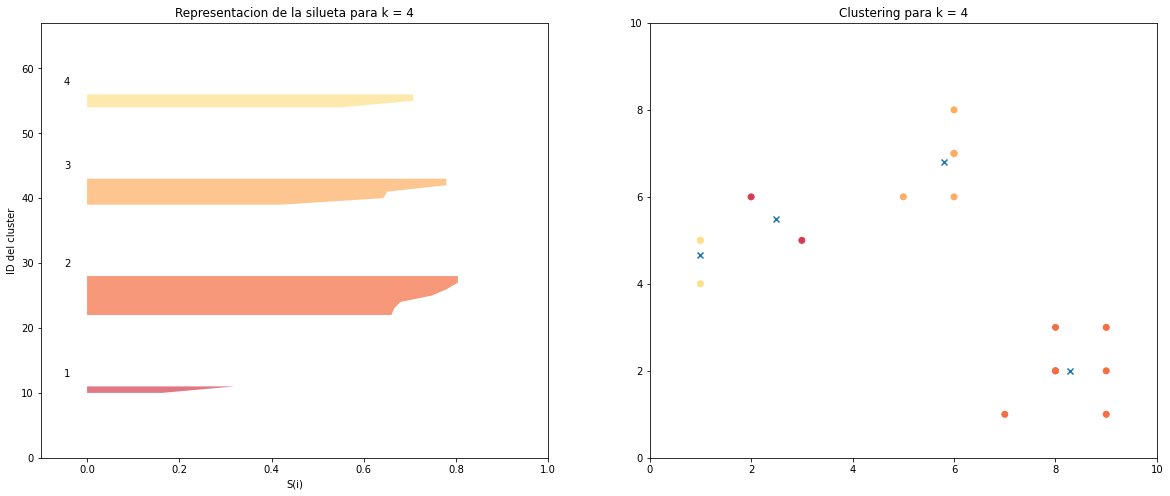

* para K =  5  el promedio de la silueta es de :  0.46983374375750137
  - para i =  1  la silueta del cluster vale:  0.37765685097302226
  - para i =  2  la silueta del cluster vale:  0.24096929517637128
  - para i =  3  la silueta del cluster vale:  0.654458796162702
  - para i =  4  la silueta del cluster vale:  0.655666655624379
  - para i =  5  la silueta del cluster vale:  0.0


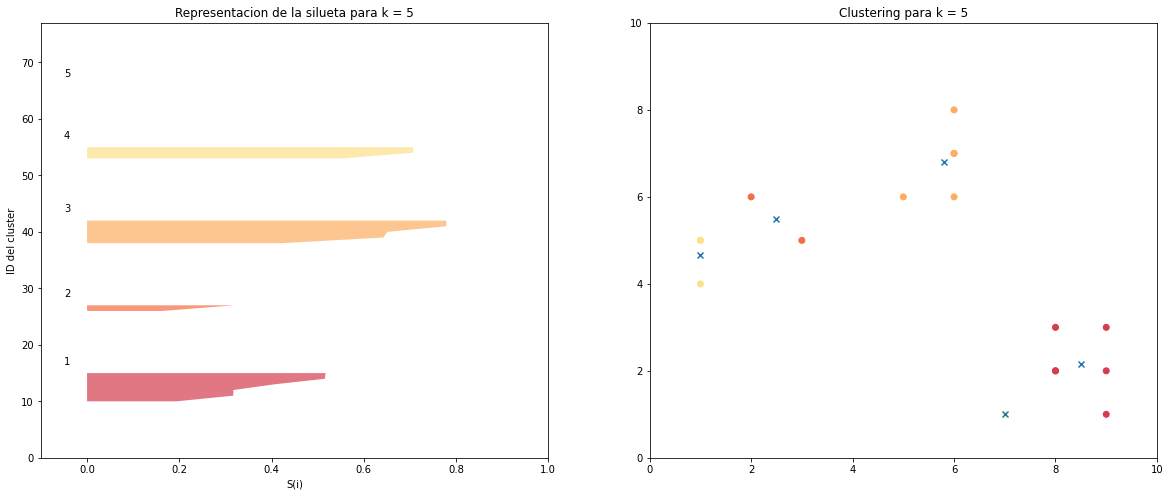

* para K =  6  el promedio de la silueta es de :  0.37500287671219246
  - para i =  1  la silueta del cluster vale:  0.1899052168375926
  - para i =  2  la silueta del cluster vale:  0.24096929517637128
  - para i =  3  la silueta del cluster vale:  0.5664789734180768
  - para i =  4  la silueta del cluster vale:  0.2698039021743969
  - para i =  5  la silueta del cluster vale:  0.32882042637679976
  - para i =  6  la silueta del cluster vale:  0.655666655624379


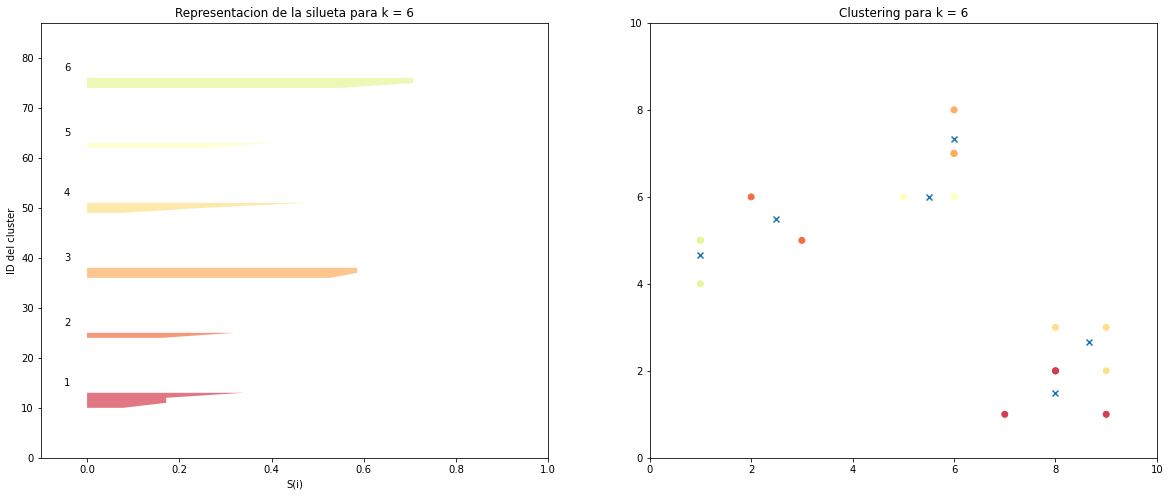

* para K =  7  el promedio de la silueta es de :  0.42012495980374426
  - para i =  1  la silueta del cluster vale:  0.2751262658470836
  - para i =  2  la silueta del cluster vale:  0.655666655624379
  - para i =  3  la silueta del cluster vale:  0.32882042637679976
  - para i =  4  la silueta del cluster vale:  0.3869086846339371
  - para i =  5  la silueta del cluster vale:  0.5664789734180768
  - para i =  6  la silueta del cluster vale:  0.24096929517637128
  - para i =  7  la silueta del cluster vale:  0.31256470041698214


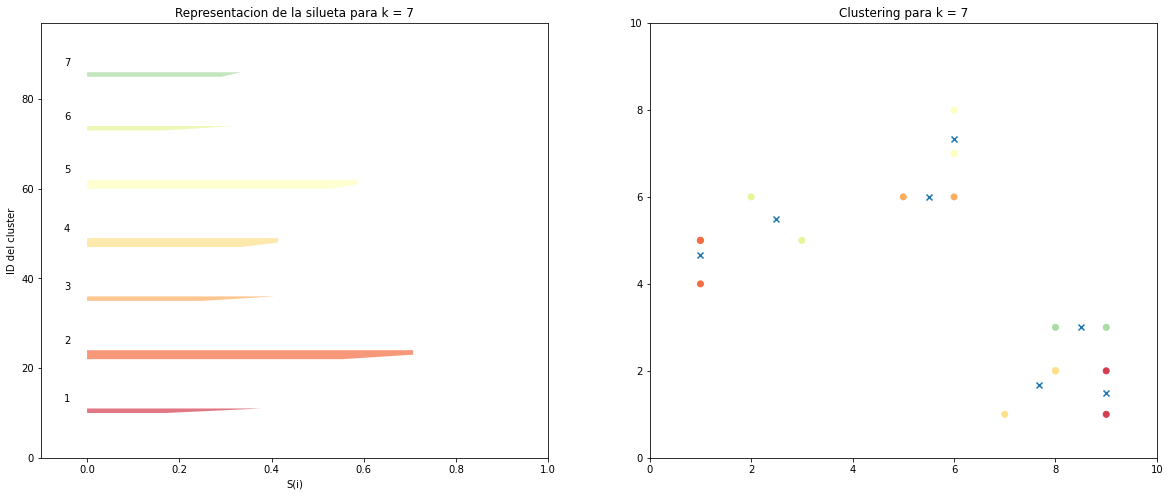

* para K =  8  el promedio de la silueta es de :  0.35345323083317454
  - para i =  1  la silueta del cluster vale:  0.32882042637679976
  - para i =  2  la silueta del cluster vale:  0.30004208861569454
  - para i =  3  la silueta del cluster vale:  0.6152265411044983
  - para i =  4  la silueta del cluster vale:  0.0
  - para i =  5  la silueta del cluster vale:  0.3028895866899326
  - para i =  6  la silueta del cluster vale:  0.5664789734180768
  - para i =  7  la silueta del cluster vale:  0.0
  - para i =  8  la silueta del cluster vale:  0.0


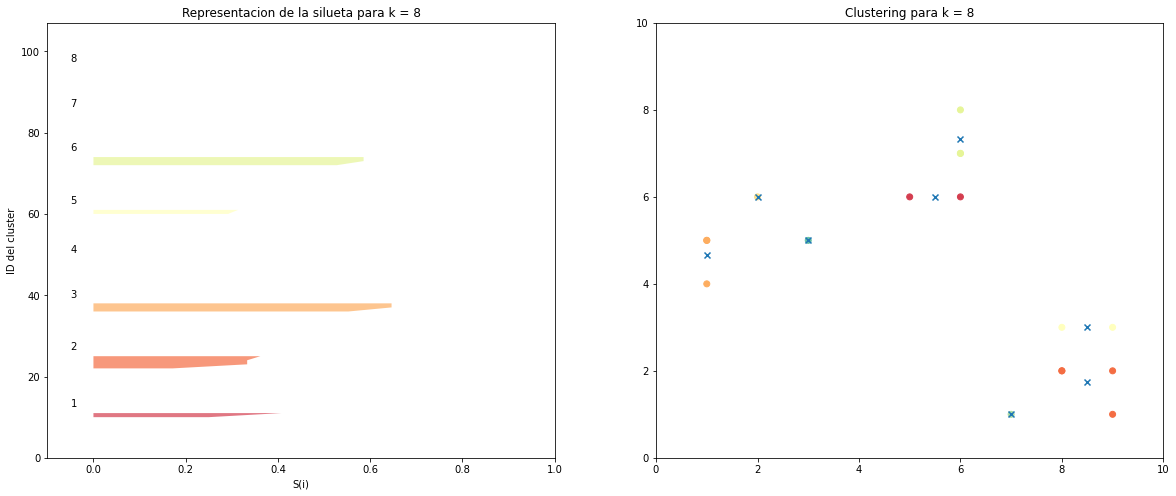

* para K =  9  el promedio de la silueta es de :  0.39932610787930767
  - para i =  1  la silueta del cluster vale:  0.0
  - para i =  2  la silueta del cluster vale:  0.14644660940672627
  - para i =  3  la silueta del cluster vale:  0.32882042637679976
  - para i =  4  la silueta del cluster vale:  0.14644660940672627
  - para i =  5  la silueta del cluster vale:  0.5664789734180768
  - para i =  6  la silueta del cluster vale:  0.6152265411044983
  - para i =  7  la silueta del cluster vale:  1.0
  - para i =  8  la silueta del cluster vale:  0.0
  - para i =  9  la silueta del cluster vale:  0.0


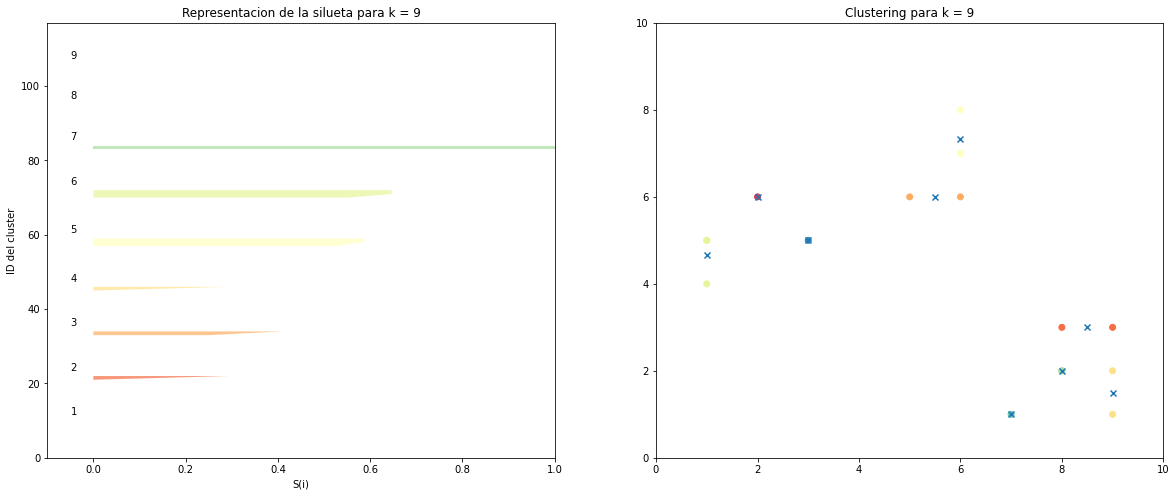

In [14]:
max_k = 10 ## maximo numero de clusters a crear
K = range(1, max_k)
ssw = []
cmap = cm.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    
    ## Fabricaremos una silueta para cada cluster
    ## Por seguridad, nohacemos silueta si k = 1 o k= len(X)
    if 1<k<len(X):
        # Crear un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        # El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        # En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        # El número de clusters a insertar determinara el tamaño de cada barra
        # El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos
        # entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* para K = ", k, " el promedio de la silueta es de : ",  silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster i-esimo
            ith_cluster_sv = sample_silhouette_values[labels == i ]
            print("  - para i = ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            # ordenamos descendientemente las siluetas del cluster i-esimo
            ith_cluster_sv.sort()
            # Calculamos donde color la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            # Elegimos el color del cluster
            color = color_palette[i]
            # pintamos la silueta del cluster i-esimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            #etiqueetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 + ith_cluster_size, str(i+1))
            
            # calculamos el nuevo y:lower para el siguiente cluster frafico
            y_lower = y_upper + 10 # dejamos vacias 10 posiciones sin muestra
            
        axis1.set_title("Representacion de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        ## Fin de la representación de la silueta
        
    # Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c = label_color)
    plt.scatter(centers[0], centers[1],  marker = "x")
    plt.show()

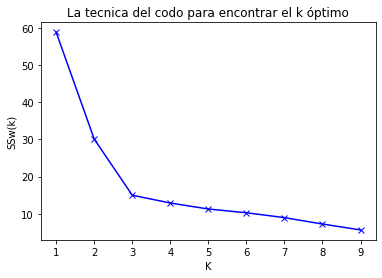

In [15]:
# Representación del método del codo

plt.plot(K, ssw, "bx-")
plt.xlabel("K")
plt.ylabel("SSw(k)")
plt.title("La tecnica del codo para encontrar el k óptimo")

plt.show()

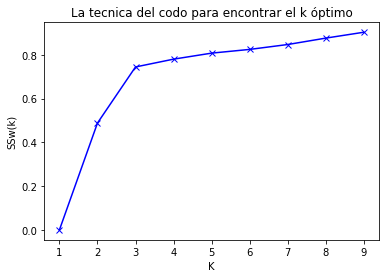

In [16]:
# Representación del codo normalizado
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("K")
plt.ylabel("SSw(k)")
plt.title("La tecnica del codo para encontrar el k óptimo")

plt.show()